# Workflow

The Jupyter Notebook environment, by which I
mean to include JupyterLab, has a top-to-bottom flow feeling.  Don't fight that.  Let the logic follow a chronology, from top to bottom.  

If you want to tell the story quite differently, from another angle, elsewhere, do that.  

Use the same data sources sometimes (read-only?).

Take a chapters-oriented approach.  Write a novel (so-to-speak).

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/6578251943/in/photolist-WyUd7h-UTKEEb-b2ig7X-8awzZ7-82F73w-7SDcAe" title="Mt Tabor Reservoir"><img src="https://live.staticflickr.com/7144/6578251943_fc68eeb88e.jpg" width="500" height="375" alt="Mt Tabor Reservoir"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

That being said, it's fine to define some machinery (e.g. Python functions) up front, at the top, and then demonstrate behavior as the story unfolds.

In [1]:
import pandas as pd

Think of a board game.  This isn't Monopoly exactly, as we're looking at giving money to charity through a "switchboard" of gamers doing homework.

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/48140645242/in/dateposted-public/" title="P1080964"><img src="https://live.staticflickr.com/65535/48140645242_b0472ab5f5.jpg" width="500" height="500" alt="P1080964"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [2]:
company_names = ['Tech Giant', 'Fast Food Chain', 'Hotel Chain']
profits = [100_000.00, 700_000_000.00, 1_000_000.00]

In [3]:
profit_centers = pd.DataFrame({
        "Companies": pd.Series(company_names,
        dtype=pd.np.unicode),
        "Profits": pd.Series(profits,
        dtype=pd.np.float)})

In [4]:
profit_centers

,Companies,Profits
0,Tech Giant,100000.0
1,Fast Food Chain,700000000.0
2,Hotel Chain,1000000.0


In [5]:
profit_centers.index = ['DZX', 'FFC', 'HHC']

In [6]:
profit_centers

,Companies,Profits
DZX,Tech Giant,100000.0
FFC,Fast Food Chain,700000000.0
HHC,Hotel Chain,1000000.0


### What have we accomplished?

We have started creating what could become a much larger database over time, of companies with profits.  The realism is already lacking in the a profit comes within a time period, and we have yet to register this fact.

In [7]:
profit_centers

,Companies,Profits
DZX,Tech Giant,100000.0
FFC,Fast Food Chain,700000000.0
HHC,Hotel Chain,1000000.0


In [ ]:
more_realistic = ([
    ('DZX', '2019', 100000.0),
    ('FFC', '2019', 70000000.0),
    ('HHC', '2019', 1000000.0),
    ('FFC', '2018', 70000000.0),
    ('DZX', '2018', 100000.0),
    ('HHC', '2018', 1000000.0),
    ('FFC', '2017', 10000.0)
])

In [8]:
from collections import namedtuple

profit_record = namedtuple("PR", "ccode year curr")

In [9]:
def make_reports(nm_tuple, target):
    # primitive native Python object
    annual_reports = [ ] # empty list
    for pr_rec in target:
        # append namedtuple type objects to a list
        annual_reports.append(
            nm_tuple(*pr_rec))

    return annual_reports

In [10]:
# send in template + data
annual_reports = make_reports(profit_record, more_realistic) # noise yet to be added
annual_reports

[PR(ccode='DZX', year='2019', curr=100000.0),
 PR(ccode='FFC', year='2019', curr=70000000.0),
 PR(ccode='HHC', year='2019', curr=1000000.0),
 PR(ccode='FFC', year='2018', curr=70000000.0),
 PR(ccode='DZX', year='2018', curr=100000.0),
 PR(ccode='HHC', year='2018', curr=1000000.0),
 PR(ccode='FFC', year='2017', curr=10000.0)]

In [11]:
template = "{obj.ccode} {obj.year} {obj.curr:>15.2f}"
for pr_rec in annual_reports:
    print(template.format(obj = pr_rec))

DZX 2019       100000.00
FFC 2019     70000000.00
HHC 2019      1000000.00
FFC 2018     70000000.00
DZX 2018       100000.00
HHC 2018      1000000.00
FFC 2017        10000.00


This looks like some intermediate table in a relational database, where we store lots of data in (ccode year curr) format.

In practice, we're not necessarily accessing any API to get these numbers.  Some end user has their own sources and imports them.

We do want to have more randomized numbers though, so lets toggle floats up or down by x percent, where x is between 0 and 5 inclusive.

In [12]:
from random import randint # plain vanilla Python

def noise(float_in):
    percent = randint(0, 6)/100 # includes 5
    if randint(0, 1): # flip a coin
        sign = -1
    else:
        sign = 1
    return float_in + sign * percent * float_in

In [13]:
list(map(noise, [1000]*10))

[990.0, 1060.0, 1060.0, 1030.0, 1000.0, 1000.0, 1000.0, 1010.0, 960.0, 1050.0]

In [14]:
more_realistic = ([
    ('DZX', '2019', noise(100000.0)),
    ('FFC', '2019', noise(70000000.0)),
    ('HHC', '2019', noise(1000000.0)),
    ('FFC', '2018', noise(70000000.0)),
    ('DZX', '2018', noise(100000.0)),
    ('HHC', '2018', noise(1000000.0)),
    ('FFC', '2017', noise(10000.0))
])
more_realistic

[('DZX', '2019', 100000.0),
 ('FFC', '2019', 71400000.0),
 ('HHC', '2019', 1030000.0),
 ('FFC', '2018', 67200000.0),
 ('DZX', '2018', 102000.0),
 ('HHC', '2018', 990000.0),
 ('FFC', '2017', 9900.0)]

In [15]:
reports = make_reports(profit_record, more_realistic)
reports

[PR(ccode='DZX', year='2019', curr=100000.0),
 PR(ccode='FFC', year='2019', curr=71400000.0),
 PR(ccode='HHC', year='2019', curr=1030000.0),
 PR(ccode='FFC', year='2018', curr=67200000.0),
 PR(ccode='DZX', year='2018', curr=102000.0),
 PR(ccode='HHC', year='2018', curr=990000.0),
 PR(ccode='FFC', year='2017', curr=9900.0)]

Lets remember our old friend ```usercrud.py``` and adapt some of those tools to our benefit.

In [16]:
! cp ../Session08/usercrud.py .
! cp ../Session08/users.db .
! cp ../Session08/context1.py .

In [17]:
# %load usercrud.py
#!/usr/bin/env python3

```create_table``` looks promising, we'll modify that, create a table in a new database
(or in an old one), and insert our profit report records.  We're talking directly to SQL in core standard library Python.


https://www.sqlite.org/images/syntax/select-stmt.gif

In [18]:
%%HTML 
<img src="https://www.sqlite.org/images/syntax/select-stmt.gif" width="300" />

In [19]:
from context1 import DB

def check_tables(db_name):
    global testme
    with DB("coffeeshops.db") as db:
        db.curs.execute("SELECT * FROM sqlite_master where type='table'")
        results = db.curs.fetchall()
        if results and db_name in results[0]:
            return True
        else:
            print("No {} table".format(db_name))
            return False
    
def create_table():
    if check_tables("annual_profits"):
        return "Table already exists"
    else:
        with DB("coffeeshops.db") as db:
            db.curs.execute("CREATE TABLE "
                            "annual_profits "
                            "(ccode  text, "
                            " year   text, "
                            " amount float)") 
        print("Table created")

In [20]:
create_table()

'Table already exists'

Want to start over at this point?  Start with no database at all.  Remember ```context1``` from last time?

In [21]:
# run if you want to remind yourself of the code
# %load context1.py

In [22]:
! rm coffeeshops.db

In [23]:
create_table()

No annual_profits table
Table created


In [24]:
%%HTML 
<img src="https://www.sqlite.org/images/syntax/insert-stmt.gif" width="300" />

In [25]:
def add_one(ccode, yr, amt):
    with DB("coffeeshops.db") as db:
        if check_tables("annual_profits"):
            db.curs.execute("INSERT INTO annual_profits  "
                            "(ccode, year, amount) "
                            "VALUES (?, ?, ?)", 
                            (ccode, yr, amt))
            db.conn.commit()
            print("profit report added")

In [26]:
#profit_record = namedtuple("PR", 
#                    "ccode year curr")

for report in reports:
    add_one(report.ccode, 
            report.year, 
            report.curr)

profit report added
profit report added
profit report added
profit report added
profit report added
profit report added
profit report added


```python
pandas.read_sql(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, columns=None, chunksize=None)
```

In [27]:
query = "SELECT * FROM annual_profits"
with DB("coffeeshops.db") as db:
    df_profits = pd.read_sql(query, db.conn)

In [28]:
df_profits

,ccode,year,amount
0,DZX,2019,100000.0
1,FFC,2019,71400000.0
2,HHC,2019,1030000.0
3,FFC,2018,67200000.0
4,DZX,2018,102000.0
5,HHC,2018,990000.0
6,FFC,2017,9900.0


In [34]:
import csn0
csn0.data()
csn0.causes  = csn0.make_causes()
csn0.players = csn0.make_players()
csn0.games   = csn0.make_games()
print(csn0.hall_of_fame)
csn0.simulation2()
print()
print(csn0.hall_of_fame)

Empty DataFrame
Columns: [pcode, gcode, zcode, amnt, timestamp]
Index: []
Greetings Gus
Game: Awesome Journey, code: ASM
Thank you for playing Awesome Journey
Action action, bling bling...
Save the Bees gets 5.2
Gus gives 5.2 to Save the Bees
Greetings Keela
Game: Treasure Hunt, code: TSH
Thank you for playing Treasure Hunt
Action action, bling bling...
Save the Whales gets 9.09
Keela gives 9.09 to Save the Whales

        pcode gcode zcode  amnt                  timestamp
0  62128be429   ASM   STB  5.20 2019-06-28 23:59:32.788592
1  f9527247db   TSH   STW  9.09 2019-06-28 23:59:32.807610


In [35]:
csn0.hall_of_fame

,pcode,gcode,zcode,amnt,timestamp
0,62128be429,ASM,STB,5.20,2019-06-28 23:59:32.788592
1,f9527247db,TSH,STW,9.09,2019-06-28 23:59:32.807610


In [31]:
csn0.games

,gcode,name,rating,audience,theme
0,ASM,Awesome Journey,hard,teen,theme park
1,TSH,Treasure Hunt,hard,teen,VR
2,PPS,Pilgrims Progress,easy,all,epic
3,WRR,Writers Rock,medium,adult,quiz


In [32]:
csn0.causes

,zcode,name
0,STB,Save the Bees
1,STW,Save the Whales
2,STS,Save the Seas


In [33]:
csn0.players

,pcode,name,aliases,profile,account
0,62128be429,Gus,"gustav, gus, the guster",id-12345,200
1,f9527247db,Keela,"keesha, pandabear, sloth",id-54932,150
2,e7121e9ff0,Tor,"torror, torus, the tor",id-94031,200
3,e8a2a91e04,Mitsu,"bishi, sitcom, vagrant",id-88493,100


# Charitable Giving

What meritorious projects out there would you want to support.

How would you go about finding out about some of them?

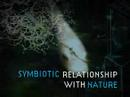

In [36]:
from IPython.display import YouTubeVideo
YouTubeVideo("NZKUahBTBsI")